### Student Information
Name:吳余山

Student ID:110033408

GitHub ID:ngusan

Kaggle name:ng

Kaggle private scoreboard snapshot:52/95

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

In [1]:
### Begin Assignment Here

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


** >>> Exercise 1 (Take home): **
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [7]:
# import packages
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
# Vectorize train data
train_count_vect = CountVectorizer()
train_count = train_count_vect.fit_transform(train_df.text)


In [9]:
# Calculate frequencies
train_term_frequencies = {}
for j in range(0,train_count.shape[1]):
    train_term_frequencies[train_count_vect.get_feature_names()[j]] = sum(train_count[:,j].toarray())

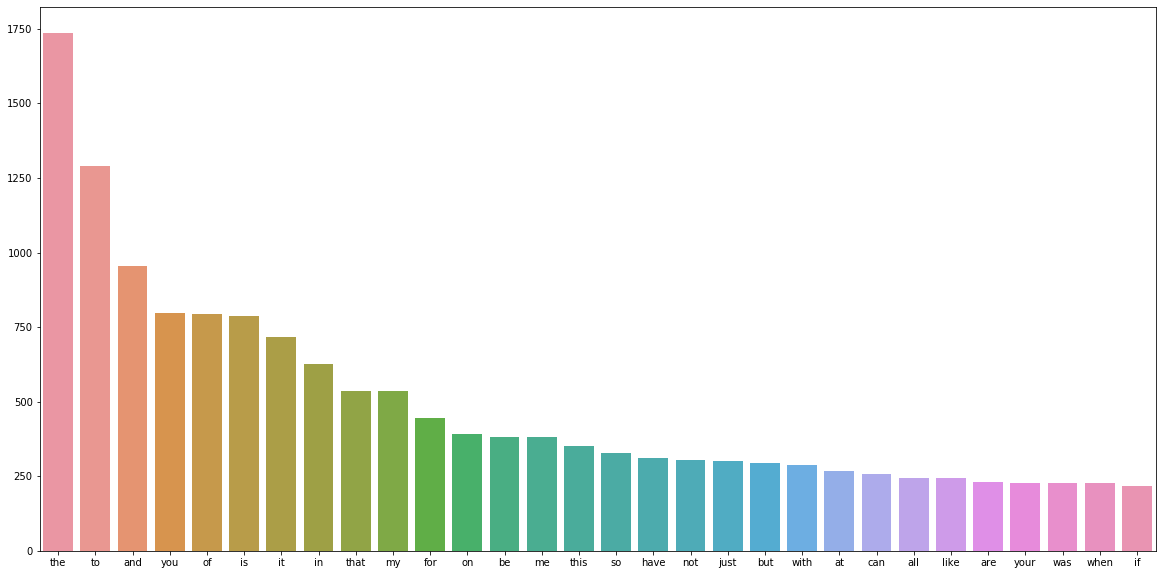

In [10]:
# plot
train_sum_freq_df = pd.DataFrame(train_term_frequencies)
train_sum_freq_df = train_sum_freq_df.sort_values(by = 0, axis = 1, ascending = False)
train_sum_freq_df = train_sum_freq_df[train_sum_freq_df.columns[:30]].copy()
plt.subplots(figsize=(20, 10))
ax = sns.barplot(data=train_sum_freq_df)

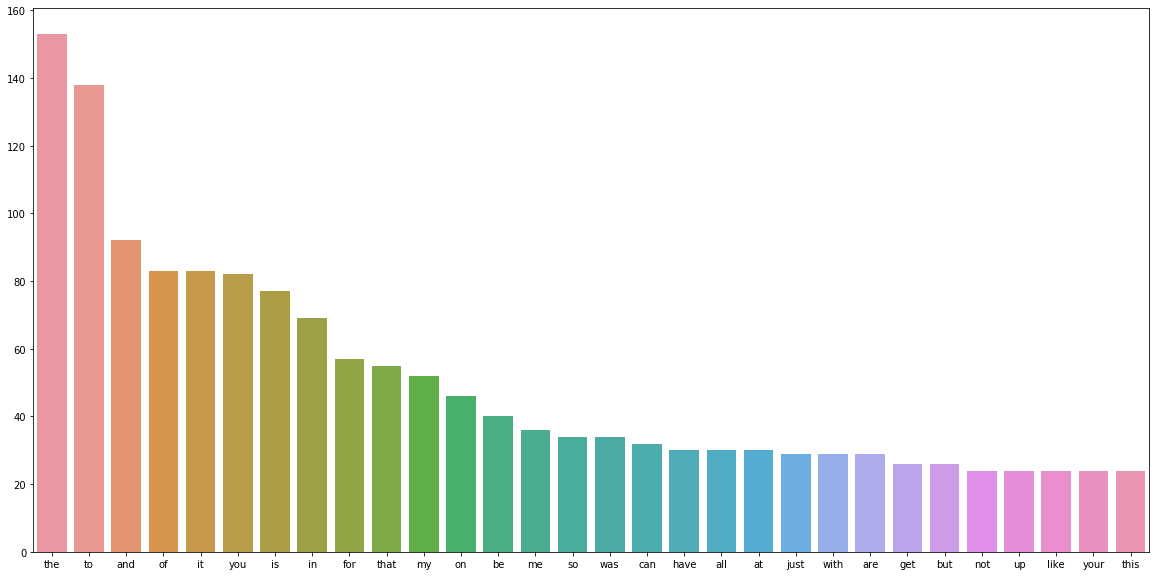

In [11]:
# Vectorize train data
test_count_vect = CountVectorizer()
test_count = test_count_vect.fit_transform(test_df.text)
# Calculate frequencies
test_term_frequencies = {}
for j in range(0,test_count.shape[1]):
    test_term_frequencies[test_count_vect.get_feature_names()[j]] = sum(test_count[:,j].toarray())
# plot
test_sum_freq_df = pd.DataFrame(test_term_frequencies)
test_sum_freq_df = test_sum_freq_df.sort_values(by = 0, axis = 1, ascending = False)
test_sum_freq_df = test_sum_freq_df[test_sum_freq_df.columns[:30]].copy()
plt.subplots(figsize=(20, 10))
ax = sns.barplot(data=test_sum_freq_df)

Exercise 2
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110]

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
# init TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

In [14]:
train_data = tfidf_vectorizer.fit_transform(train_df['text'])

In [15]:
train_data.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
tfidf_vectorizer.get_feature_names()[100:110]

['bitter',
 'black',
 'blacks',
 'blame',
 'blessed',
 'blood',
 'bloody',
 'blues',
 'body',
 'boiling']

In [17]:
test_data = tfidf_vectorizer.fit_transform(test_df['text'])
tfidf_vectorizer.get_feature_names()[100:110]

['bout',
 'box',
 'boy',
 'brace',
 'braved',
 'bread',
 'breezy',
 'brewing',
 'brian',
 'brilliant']

Exercise 3
Can you interpret the results above? What do they mean?
Ans：
Horizontal axis means real labels
Vertical axis means predict labels
so the diagonal means predict Correctly
and the colors means the range of corrections 
the more correct the darker
but we can see that the recall and the Precision is just around 60% so is not really well
although it is not really well, we also can see that the features of the text on specific emotion may have some similarity with others' emtions, and make the model to predict to the wrong result.

2. Feature engineering-BOW


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [19]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [20]:
# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [21]:
# check the result
train_data_BOW_features
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [22]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [24]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]
"😂" in feature_names


False

In [25]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

In [26]:
# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

/Users/ngusan/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [27]:
## check dimension
train_data_BOW_features_500.shape
train_data_BOW_features_500.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]
"😂" in feature_names_500

True

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

---
## 3. Model
### 3.1 Naive Bayes
Using scikit-learn ```MultinomialNB``` performs word frequency and uses these as features to train a model.  

In [29]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

TFIDF

In [30]:
# for a classificaiton problem, you need to provide both training & testing data
X_train_TFIDF = train_data
y_train_TFIDF = train_df['emotion']

X_test_TFIDF = test_data
y_test_TFIDF = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train_bow1.shape: ', X_train_TFIDF.shape)
print('y_train_bow1.shape: ', y_train_TFIDF.shape)
print('X_test_bow1.shape: ', X_test_TFIDF.shape)
print('y_test_bow1.shape: ', y_test_TFIDF.shape)

X_train_bow1.shape:  (3613, 1000)
y_train_bow1.shape:  (3613,)
X_test_bow1.shape:  (347, 1000)
y_test_bow1.shape:  (347,)


BOW1

In [31]:
# for a classificaiton problem, you need to provide both training & testing data
X_train_bow1 = train_data_BOW_features
y_train_bow1 = train_df['emotion']

X_test_bow1 = test_data_BOW_features
y_test_bow1 = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train_bow1.shape: ', X_train_bow1.shape)
print('y_train_bow1.shape: ', y_train_bow1.shape)
print('X_test_bow1.shape: ', X_test_bow1.shape)
print('y_test_bow1.shape: ', y_test_bow1.shape)

X_train_bow1.shape:  (3613, 10115)
y_train_bow1.shape:  (3613,)
X_test_bow1.shape:  (347, 10115)
y_test_bow1.shape:  (347,)


BOW2

In [32]:
# for a classificaiton problem, you need to provide both training & testing data
X_train_bow2 = BOW_500.transform(train_df['text'])
y_train_bow2 = train_df['emotion']

X_test_bow2 = BOW_500.transform(test_df['text'])
y_test_bow2 = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train_bow2.shape: ', X_train_bow2.shape)
print('y_train_bow2.shape: ', y_train_bow2.shape)
print('X_test_bow2.shape: ', X_test_bow2.shape)
print('y_test_bow2.shape: ', y_test_bow2.shape)


X_train_bow2.shape:  (3613, 500)
y_train_bow2.shape:  (3613,)
X_test_bow2.shape:  (347, 500)
y_test_bow2.shape:  (347,)


TFIDF

training accuracy: 0.87
testing accuracy: 0.28
              precision    recall  f1-score   support

       anger       0.27      0.33      0.30        84
        fear       0.35      0.35      0.35       110
         joy       0.24      0.24      0.24        79
     sadness       0.22      0.16      0.19        74

    accuracy                           0.28       347
   macro avg       0.27      0.27      0.27       347
weighted avg       0.28      0.28      0.28       347

[[28 22 19 15]
 [25 39 30 16]
 [23 26 19 11]
 [27 24 11 12]]


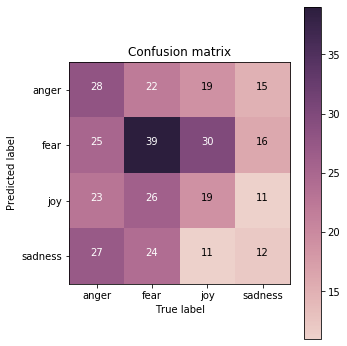

In [33]:
## build Naive Bayes model
TFIDF_model = MultinomialNB()

## training!
TFIDF_model = TFIDF_model.fit(X_train_TFIDF, y_train_TFIDF)

## predict!
y_train_pred_TFIDF = TFIDF_model.predict(X_train_TFIDF)
y_test_pred_TFIDF = TFIDF_model.predict(X_test_TFIDF)

## so we get the pred result
y_test_pred_TFIDF[:10]

## accuracy

from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train_TFIDF, y_pred=y_train_pred_TFIDF)
acc_test = accuracy_score(y_true=y_test_TFIDF, y_pred=y_test_pred_TFIDF)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score

from sklearn.metrics import classification_report

print(classification_report(y_true=y_test_TFIDF, y_pred=y_test_pred_TFIDF))

#plot confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test_TFIDF, y_pred=y_test_pred_TFIDF) 
print(cm)

# Funciton for visualizing confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()
    
# plot confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

BOW1

training accuracy: 0.97
testing accuracy: 0.77
              precision    recall  f1-score   support

       anger       0.82      0.71      0.76        84
        fear       0.69      0.86      0.77       110
         joy       0.89      0.73      0.81        79
     sadness       0.76      0.74      0.75        74

    accuracy                           0.77       347
   macro avg       0.79      0.76      0.77       347
weighted avg       0.78      0.77      0.77       347

[[60 15  3  6]
 [ 6 95  1  8]
 [ 4 14 58  3]
 [ 3 13  3 55]]


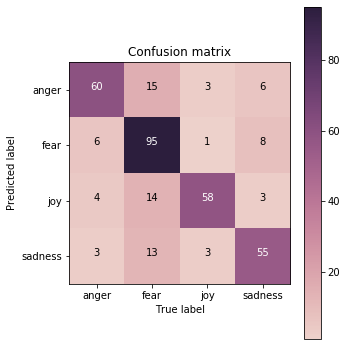

In [34]:
## build Naive Bayes model
BOW1_model = MultinomialNB()

## training!
BOW1_model = BOW1_model.fit(X_train_bow1, y_train_bow1)

## predict!
y_train_pred_bow1 = BOW1_model.predict(X_train_bow1)
y_test_pred_bow1 = BOW1_model.predict(X_test_bow1)

## so we get the pred result
y_test_pred_bow1[:10]

## accuracy

acc_train = accuracy_score(y_true=y_train_bow1, y_pred=y_train_pred_bow1)
acc_test = accuracy_score(y_true=y_test_bow1, y_pred=y_test_pred_bow1)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score

print(classification_report(y_true=y_test_bow1, y_pred=y_test_pred_bow1))

#plot confusion matrix

cm = confusion_matrix(y_true=y_test_bow1, y_pred=y_test_pred_bow1) 
print(cm)

# Funciton for visualizing confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()
    
# plot confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

BOW2

training accuracy: 0.79
testing accuracy: 0.72
              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347

[[55 14  5 10]
 [ 6 91  5  8]
 [ 9  7 56  7]
 [ 8 11  8 47]]


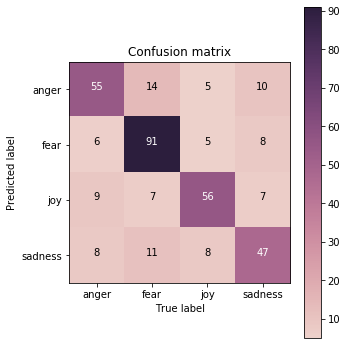

In [35]:
## build Naive Bayes model
BOW2_model = MultinomialNB()

## training!
BOW2_model = BOW2_model.fit(X_train_bow2, y_train_bow2)

## predict!
y_train_pred_bow2 = BOW2_model.predict(X_train_bow2)
y_test_pred_bow2 = BOW2_model.predict(X_test_bow2)

## so we get the pred result
y_test_pred_bow2[:10]

## accuracy

acc_train = accuracy_score(y_true=y_train_bow2, y_pred=y_train_pred_bow2)
acc_test = accuracy_score(y_true=y_test_bow2, y_pred=y_test_pred_bow2)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score

print(classification_report(y_true=y_test_bow2, y_pred=y_test_pred_bow2))

#plot confusion matrix

cm = confusion_matrix(y_true=y_test_bow2, y_pred=y_test_pred_bow2) 
print(cm)

# Funciton for visualizing confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()
    
# plot confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Tree results

training accuracy: 0.99
testing accuracy: 0.64
              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.62      0.64      0.63       110
         joy       0.67      0.68      0.68        79
     sadness       0.61      0.57      0.59        74

    accuracy                           0.64       347
   macro avg       0.64      0.64      0.64       347
weighted avg       0.64      0.64      0.64       347

[[55 16  9  4]
 [15 70  9 16]
 [ 5 13 54  7]
 [ 9 14  9 42]]


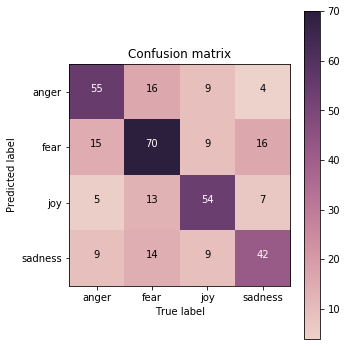

In [36]:
from sklearn.tree import DecisionTreeClassifier
## build Naive Bayes model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train_bow2, y_train_bow2)

## predict!
y_train_pred_bow2 = DT_model.predict(X_train_bow2)
y_test_pred_bow2 = DT_model.predict(X_test_bow2)

## so we get the pred result
y_test_pred_bow2[:10]

## accuracy

acc_train = accuracy_score(y_true=y_train_bow2, y_pred=y_train_pred_bow2)
acc_test = accuracy_score(y_true=y_test_bow2, y_pred=y_test_pred_bow2)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score

print(classification_report(y_true=y_test_bow2, y_pred=y_test_pred_bow2))

#plot confusion matrix

cm = confusion_matrix(y_true=y_test_bow2, y_pred=y_test_pred_bow2) 
print(cm)

# Funciton for visualizing confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()
    
# plot confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

explain

Dicision Tree tends to classify the data by feature separatly,
while Naive Bays would combine the distribute of the datas. Because of the characteristic of Naive Bays, the result is more affected by the distribute of the datas. the results shows that Dicision Tree seems to have more average result but the Naive Bay is better than Dicision Tree no matter the accuracy or precision and recall.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

In [37]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

Using TensorFlow backend.


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [38]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)



check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1556       fear
1375       fear
3238    sadness
3222    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [39]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [40]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax_1 (Softmax)          (None, 4)                 0   

In [41]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 1s 161us/step - loss: 1.3350 - accuracy: 0.3576 - val_loss: 1.2829 - val_accuracy: 0.3948
Epoch 2/25
3613/3613 [==============================] - 0s 125us/step - loss: 0.9793 - accuracy: 0.6479 - val_loss: 0.8980 - val_accuracy: 0.6715
Epoch 3/25
3613/3613 [==============================] - 0s 106us/step - loss: 0.5646 - accuracy: 0.7982 - val_loss: 0.7771 - val_accuracy: 0.7147
Epoch 4/25
3613/3613 [==============================] - 0s 114us/step - loss: 0.4027 - accuracy: 0.8519 - val_loss: 0.7551 - val_accuracy: 0.7089
Epoch 5/25
3613/3613 [==============================] - 0s 122us/step - loss: 0.3179 - accuracy: 0.8843 - val_loss: 0.8122 - val_accuracy: 0.7032
Epoch 6/25
3613/3613 [==============================] - 0s 113us/step - loss: 0.2571 - accuracy: 0.9117 - val_loss: 0.8531 - val_accuracy: 0.6916
Epoch 7/25
3613/3613 [==============================] - 0s 89us/step - loss: 

In [42]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[3.8539470e-06, 9.9950111e-01, 6.6213126e-08, 4.9498305e-04],
       [3.8890735e-06, 9.9989569e-01, 8.4223015e-05, 1.6180598e-05],
       [2.7063262e-02, 9.6879870e-01, 2.2178927e-05, 4.1158274e-03],
       [9.9904281e-01, 4.0293339e-06, 9.2903030e-04, 2.4069237e-05],
       [8.8254410e-01, 2.2968795e-04, 6.6455854e-03, 1.1058071e-01]],
      dtype=float32)

In [43]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'fear', 'fear', 'anger', 'anger'], dtype=object)

In [44]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.64


In [45]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.357598,1.335002,0.394813,1.282911
1,1,0.647938,0.979271,0.671470,0.897968
2,2,0.798229,0.564551,0.714697,0.777127
3,3,0.851924,0.402680,0.708934,0.755122
4,4,0.884307,0.317894,0.703170,0.812228
5,5,0.911708,0.257064,0.691643,0.853096
6,6,0.926377,0.218098,0.694524,0.923847
7,7,0.942984,0.180217,0.697406,1.003217
8,8,0.954332,0.153568,0.677233,1.067725
9,9,0.960421,0.136739,0.680115,1.133032


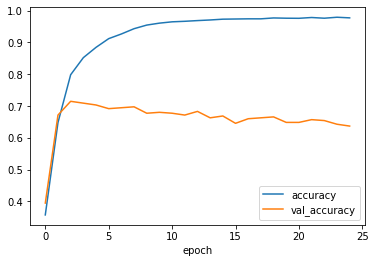

In [46]:
import matplotlib.pyplot as plt
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log.plot(x='epoch', y=['accuracy','val_accuracy'])

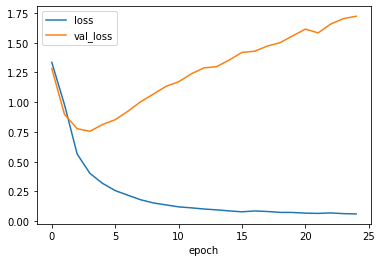

In [47]:
training_log.plot(x='epoch', y=['loss','val_loss'])

### Explan 
We can see that when epoch high than 2, the val_loss getting high not getting lower, it means that the model getting overfitting, overfitting means the model becomes very fit about the training data so the model become not universal.

In [48]:
# check library
import gensim
import nltk

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))

In [49]:
# create the training corpus
training_corpus = train_df['text_tokenized'].values

In [50]:
from gensim.models import Word2Vec

# setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

# model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

In [51]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?



Ans：
1.we can put the sequence of word into RNN model, the RNN model can use a continuous vectors to train model.
2.Or we can let the vectors to be a image be put the vectors matrix in to CNN.
3.we can calculate the means between the sentences and the label, and a article have many sentences, so that we have the features now ~ and put it into NN model. 

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [52]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

target_words = angry_words + happy_words + sad_words + fear_words

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn


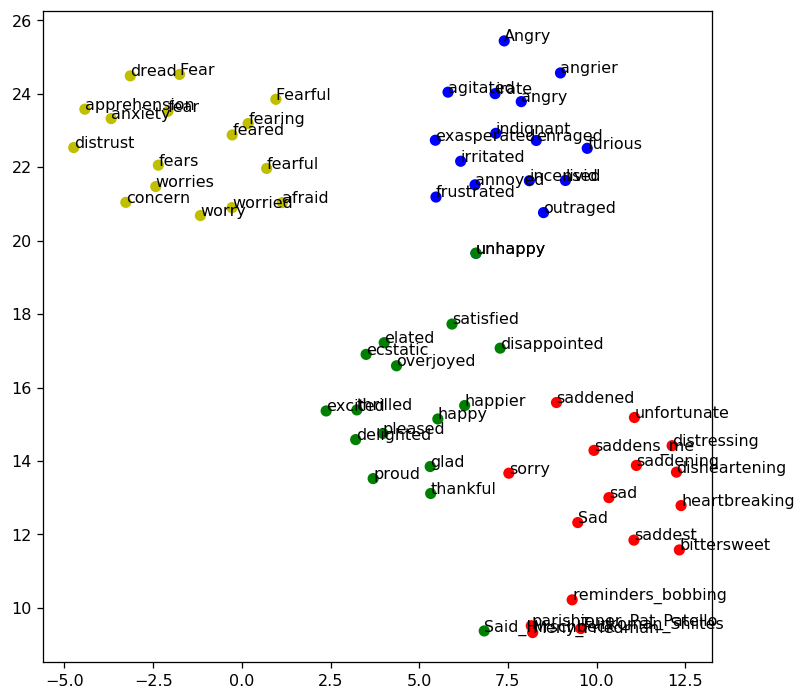

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Kaggle **  

data read:

In [50]:
import pandas as pd

In [51]:
data_json = pd.read_json("tweets_DM.json",lines=True)
data_json

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets
...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets


the text is in _source and source have tweet, tweet have hashtags, tweet_id, and text

In [52]:
data_source = data_json['_source'].apply(pd.Series)
data_source

,tweet
0,"{'hashtags': ['Snapchat'], 'tweet_id': '0x376b..."
1,"{'hashtags': ['freepress', 'TrumpLegacy', 'CNN..."
2,"{'hashtags': ['bibleverse'], 'tweet_id': '0x28..."
3,"{'hashtags': [], 'tweet_id': '0x1cd5b0', 'text..."
4,"{'hashtags': [], 'tweet_id': '0x2de201', 'text..."
...,...
1867530,"{'hashtags': ['mixedfeeling', 'butimTHATperson..."
1867531,"{'hashtags': [], 'tweet_id': '0x29d0cb', 'text..."
1867532,"{'hashtags': [], 'tweet_id': '0x2a6a4f', 'text..."
1867533,"{'hashtags': [], 'tweet_id': '0x24faed', 'text..."


In [53]:
data_tweet = data_source['tweet'].apply(pd.Series)
data_tweet

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [54]:
data_tweet = data_tweet.reindex(columns=['tweet_id','hashtags','text'])
data_tweet

,tweet_id,hashtags,text
0,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,[bibleverse],"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,[],"""Trust is not the same as faith. A friend is s..."
...,...,...,...
1867530,0x316b80,"[mixedfeeling, butimTHATperson]",When you buy the last 2 tickets remaining for ...
1867531,0x29d0cb,[],I swear all this hard work gone pay off one da...
1867532,0x2a6a4f,[],@Parcel2Go no card left when I wasn't in so I ...
1867533,0x24faed,[],"Ah, corporate life, where you can date <LH> us..."


read emotion and identification

In [56]:
data_emotion = pd.read_csv('emotion.csv')
data_identification = pd.read_csv('data_identification.csv')

combine data and identification

In [57]:
data_tweet = data_tweet.sort_values(by=['tweet_id'])
data_identification = data_identification.sort_values(by=['tweet_id'])
data = data_tweet.merge(data_identification)

In [58]:
# Separate train and test data
data_train = data[(data.identification == 'train')]
data_test = data[(data.identification == 'test')]

In [59]:
# combine train data and Label
data_train = data_train.sort_values(by=['tweet_id'])
data_emotion = data_emotion.sort_values(by=['tweet_id'])
data_train = data_train.merge(data_emotion)

In [61]:
# save processed data to .pkl file for easy using
data_train.to_pickle('data_train.pkl')
data_test.to_pickle('data_test.pkl')
data.to_pickle('data.pkl')

Actually, too many hashtags haave no emotion meanings So I think we don't need hashtags to do the predictions.

In [62]:
data_train = data_train[['tweet_id','text','emotion']]

now we have data(text) and Label(emotion), then we need to change the text to feature and train the model.

In [63]:
#before we extract feature, we Separate the Test and train data from train data, test size = 0.1
from sklearn.model_selection import train_test_split
X_train, X_yaild, y_train, y_yaild = train_test_split(data_train, data_train, test_size=0.1)

In [64]:
# BOW
from sklearn.feature_extraction.text import CountVectorizer
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(X_train['text'])
# 2. Transform documents to document-term matrix.

X_train_BOW = BOW_vectorizer.transform(X_train['text'])
y_train_BOW = y_train['emotion']
X_yaild_BOW = BOW_vectorizer.transform(X_yaild['text'])
y_yaild_BOW = y_yaild['emotion']
test_data = BOW_vectorizer.transform(data_test['text'])

X_train_bow1 = X_train_BOW
y_train_bow1 = y_train_BOW

X_test_bow1 = X_yaild_BOW
y_test_bow1 = y_yaild_BOW

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


training accuracy: 0.62
testing accuracy: 0.53
              precision    recall  f1-score   support

       anger       0.96      0.11      0.20      3944
anticipation       0.60      0.53      0.56     24939
     disgust       0.52      0.34      0.41     13786
        fear       0.88      0.17      0.29      6366
         joy       0.51      0.84      0.64     51468
     sadness       0.49      0.48      0.48     19381
    surprise       0.89      0.11      0.20      4893
       trust       0.62      0.23      0.34     20780

    accuracy                           0.53    145557
   macro avg       0.68      0.35      0.39    145557
weighted avg       0.58      0.53      0.50    145557

[[  433   228   502     2  1823   897     2    57]
 [    3 13273   444    23  9449  1044    14   689]
 [    4   638  4647    10  4780  3469     7   231]
 [    2   537   225  1105  3747   625     2   123]
 [    2  3921   717    78 43483  1729    29  1509]
 [    3  1002  1501    21  7319  9209     8   3

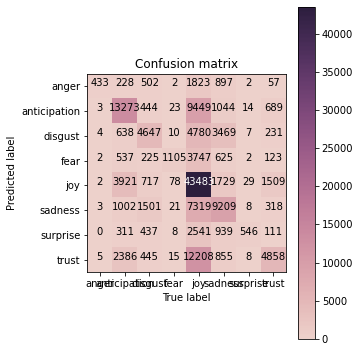

In [67]:
#model
#Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
BOW1_model = MultinomialNB()

## training!
BOW1_model = BOW1_model.fit(X_train_bow1, y_train_bow1)

## predict!
y_train_pred_bow1 = BOW1_model.predict(X_train_bow1)
y_test_pred_bow1 = BOW1_model.predict(X_test_bow1)

## so we get the pred result
y_test_pred_bow1[:10]

## accuracy

acc_train = accuracy_score(y_true=y_train_bow1, y_pred=y_train_pred_bow1)
acc_test = accuracy_score(y_true=y_test_bow1, y_pred=y_test_pred_bow1)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score

print(classification_report(y_true=y_test_bow1, y_pred=y_test_pred_bow1))

#plot confusion matrix

cm = confusion_matrix(y_true=y_test_bow1, y_pred=y_test_pred_bow1) 
print(cm)

# Funciton for visualizing confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()
    
# plot confusion matrix
my_tags = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

In [70]:
# This prediction in Kaggle is 0.44453
BOW_ans = BOW1_model.predict(test_data)
import numpy as np
Bow_ans_array = np.array(BOW_ans)
data_test_id = pd.DataFrame(data_test['tweet_id'])
data_test_id = data_test_id.sort_values(by=['tweet_id'])
data_test_id.reset_index(inplace=True, drop=True)
Bow_ans_array = np.reshape(Bow_ans_array, (-1,1))
Bow_ans_array
Bow_ans_dataframe = pd.DataFrame(Bow_ans_array)
Bow_ans_dataframe
Bow_ans_dataframe_1 = data_test_id.merge(Bow_ans_dataframe,left_index=True, right_index=True)
Bow_ans_dataframe_1
Bow_ans_dataframe_1 = Bow_ans_dataframe_1.rename(columns={'tweet_id':'id'})
Bow_ans_dataframe_1 = Bow_ans_dataframe_1.rename(columns={0:'emotion'})
Bow_ans_dataframe_1
Bow_ans_dataframe_1.to_csv('Bow_ans_dataframe.csv',
                 index= False)

### The BOW-Naive Bayes model is the best prediction in my kaggle

In [73]:
#BOW-logistic regression
#this result is the next model I try, but it wasn't better than BOW-Naive Bayes
#This prediction in Kaggle is 0.44062
from sklearn.linear_model  import LogisticRegression
## build BOW-logistic regression model
BOW1_model = LogisticRegression()

## training!
BOW1_model = BOW1_model.fit(X_train_bow1, y_train_bow1)

## predict!
y_train_pred_bow1 = BOW1_model.predict(X_train_bow1)
y_test_pred_bow1 = BOW1_model.predict(X_test_bow1)

## so we get the pred result
y_test_pred_bow1[:10]

## accuracy

acc_train = accuracy_score(y_true=y_train_bow1, y_pred=y_train_pred_bow1)
acc_test = accuracy_score(y_true=y_test_bow1, y_pred=y_test_pred_bow1)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score

print(classification_report(y_true=y_test_bow1, y_pred=y_test_pred_bow1))

#plot confusion matrix

cm = confusion_matrix(y_true=y_test_bow1, y_pred=y_test_pred_bow1) 
print(cm)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


training accuracy: 0.56
testing accuracy: 0.54
              precision    recall  f1-score   support

       anger       0.59      0.25      0.35      3944
anticipation       0.61      0.52      0.56     24939
     disgust       0.50      0.36      0.42     13786
        fear       0.69      0.32      0.44      6366
         joy       0.53      0.82      0.64     51468
     sadness       0.51      0.45      0.48     19381
    surprise       0.62      0.21      0.31      4893
       trust       0.56      0.29      0.38     20780

    accuracy                           0.54    145557
   macro avg       0.58      0.40      0.45    145557
weighted avg       0.55      0.54      0.52    145557

[[  976   231   481    26  1397   710    22   101]
 [   72 12923   556   126  9181   972    80  1029]
 [  175   685  4959   133  4543  2815   119   357]
 [   31   464   286  2041  2854   490    32   168]
 [  141  3496   909   264 42132  1906   153  2467]
 [  172  1017  1859   189  6702  8795   139   5

In [75]:
import numpy as np
lr_ans = BOW1_model.predict(test_data)
lr_ans_array = np.array(lr_ans)
data_test_id = pd.DataFrame(data_test['tweet_id'])
data_test_id = data_test_id.sort_values(by=['tweet_id'])
data_test_id.reset_index(inplace=True, drop=True)
lr_ans_array = np.reshape(lr_ans_array, (-1,1))
lr_ans_array
lr_ans_dataframe = pd.DataFrame(lr_ans_array)
lr_ans_dataframe
lr_ans_dataframe_1 = data_test_id.merge(lr_ans_dataframe,left_index=True, right_index=True)
lr_ans_dataframe_1
lr_ans_dataframe_1 = lr_ans_dataframe_1.rename(columns={'tweet_id':'id'})
lr_ans_dataframe_1 = lr_ans_dataframe_1.rename(columns={0:'emotion'})
lr_ans_dataframe_1
lr_ans_dataframe_1.to_csv('lr_ans_nltk_dataframe.csv',
                 index= False)

As we can see the result of BOW-logistic regression is lower than BOW-Naive Bayes 
so that the result in Kaggle is also lower.

In addition to the BOW, I also try another features but their is not real good in my computer verify calculations

## BOW-nltk

In [76]:
#nltk 500
import nltk

# build analyzers (bag-of-words)
BOW_500_vectorizer = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_500_vectorizer.fit(X_train['text'])
# 2. Transform documents to document-term matrix.

X_train_BOW_500 = BOW_500_vectorizer.transform(X_train['text'])
y_train_BOW_500 = y_train['emotion']
X_yaild_BOW_500 = BOW_500_vectorizer.transform(X_yaild['text'])
y_yaild_BOW_500 = y_yaild['emotion']
test_data_500 = BOW_500_vectorizer.transform(data_test['text'])

X_train_bow1 = X_train_BOW_500
y_train_bow1 = y_train_BOW_500

X_test_bow1 = X_yaild_BOW_500
y_test_bow1 = y_yaild_BOW_500

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [77]:
from sklearn.naive_bayes import MultinomialNB
## build Naive Bayes model
BOW1_model = MultinomialNB()

## training!
BOW1_model = BOW1_model.fit(X_train_bow1, y_train_bow1)

## predict!
y_train_pred_bow1 = BOW1_model.predict(X_train_bow1)
y_test_pred_bow1 = BOW1_model.predict(X_test_bow1)

## so we get the pred result
y_test_pred_bow1[:10]

## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train_bow1, y_pred=y_train_pred_bow1)
acc_test = accuracy_score(y_true=y_test_bow1, y_pred=y_test_pred_bow1)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score

from sklearn.metrics import classification_report

print(classification_report(y_true=y_test_bow1, y_pred=y_test_pred_bow1))

#plot confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test_bow1, y_pred=y_test_pred_bow1) 
print(cm)

training accuracy: 0.42
testing accuracy: 0.42
              precision    recall  f1-score   support

       anger       0.17      0.12      0.14      3944
anticipation       0.45      0.42      0.44     24939
     disgust       0.29      0.31      0.30     13786
        fear       0.18      0.12      0.15      6366
         joy       0.48      0.63      0.55     51468
     sadness       0.36      0.36      0.36     19381
    surprise       0.43      0.12      0.18      4893
       trust       0.36      0.21      0.26     20780

    accuracy                           0.42    145557
   macro avg       0.34      0.29      0.30    145557
weighted avg       0.40      0.42      0.40    145557

[[  479   336   672   172  1473   611    26   175]
 [  294 10512  1582   626  8360  1791   103  1671]
 [  302  1011  4289   444  4173  2974   121   472]
 [  111   589   797   794  3009   789    29   248]
 [  742  6142  2417  1263 32550  3783   237  4334]
 [  513  1394  3188   593  5819  7034   144   6

In [79]:
#nltk 500-lr
#BOW-logistic regression
#this result is the next model I try, but it wasn't better than BOW-Naive Bayes
#This prediction in Kaggle is 0.44062
from sklearn.linear_model  import LogisticRegression
## build BOW-logistic regression model
BOW1_model = LogisticRegression()

## training!
BOW1_model = BOW1_model.fit(X_train_bow1, y_train_bow1)

## predict!
y_train_pred_bow1 = BOW1_model.predict(X_train_bow1)
y_test_pred_bow1 = BOW1_model.predict(X_test_bow1)

## so we get the pred result
y_test_pred_bow1[:10]

## accuracy

acc_train = accuracy_score(y_true=y_train_bow1, y_pred=y_train_pred_bow1)
acc_test = accuracy_score(y_true=y_test_bow1, y_pred=y_test_pred_bow1)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score

print(classification_report(y_true=y_test_bow1, y_pred=y_test_pred_bow1))

#plot confusion matrix

cm = confusion_matrix(y_true=y_test_bow1, y_pred=y_test_pred_bow1) 
print(cm)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


training accuracy: 0.46
testing accuracy: 0.46
              precision    recall  f1-score   support

       anger       0.66      0.06      0.11      3944
anticipation       0.54      0.40      0.46     24939
     disgust       0.39      0.21      0.27     13786
        fear       0.38      0.06      0.11      6366
         joy       0.45      0.84      0.59     51468
     sadness       0.45      0.34      0.39     19381
    surprise       0.59      0.11      0.19      4893
       trust       0.51      0.13      0.21     20780

    accuracy                           0.46    145557
   macro avg       0.49      0.27      0.29    145557
weighted avg       0.47      0.46      0.41    145557

[[  227   250   375    28  2354   639    11    60]
 [   11  9917   607   125 12517  1115    61   586]
 [   31   809  2923    98  7199  2494    60   172]
 [   14   475   424   410  4353   591    16    83]
 [   25  3526   922   182 43473  1816    99  1425]
 [   23  1082  1470   110  9725  6643    77   2

In [80]:
#nltk 1000

import nltk

# build analyzers (bag-of-words)
BOW_1000_vectorizer = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_1000_vectorizer.fit(X_train['text'])
# 2. Transform documents to document-term matrix.

X_train_BOW_1000 = BOW_500_vectorizer.transform(X_train['text'])
y_train_BOW_1000 = y_train['emotion']
X_yaild_BOW_1000 = BOW_500_vectorizer.transform(X_yaild['text'])
y_yaild_BOW_1000 = y_yaild['emotion']
test_data_1000 = BOW_500_vectorizer.transform(data_test['text'])

X_train_bow1 = X_train_BOW_1000
y_train_bow1 = y_train_BOW_1000

X_test_bow1 = X_yaild_BOW_1000
y_test_bow1 = y_yaild_BOW_1000

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [81]:
from sklearn.naive_bayes import MultinomialNB
## build Naive Bayes model
BOW1_model = MultinomialNB()

## training!
BOW1_model = BOW1_model.fit(X_train_bow1, y_train_bow1)

## predict!
y_train_pred_bow1 = BOW1_model.predict(X_train_bow1)
y_test_pred_bow1 = BOW1_model.predict(X_test_bow1)

## so we get the pred result
y_test_pred_bow1[:10]

## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train_bow1, y_pred=y_train_pred_bow1)
acc_test = accuracy_score(y_true=y_test_bow1, y_pred=y_test_pred_bow1)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score

from sklearn.metrics import classification_report

print(classification_report(y_true=y_test_bow1, y_pred=y_test_pred_bow1))

#plot confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test_bow1, y_pred=y_test_pred_bow1) 
print(cm)

training accuracy: 0.42
testing accuracy: 0.42
              precision    recall  f1-score   support

       anger       0.17      0.12      0.14      3944
anticipation       0.45      0.42      0.44     24939
     disgust       0.29      0.31      0.30     13786
        fear       0.18      0.12      0.15      6366
         joy       0.48      0.63      0.55     51468
     sadness       0.36      0.36      0.36     19381
    surprise       0.43      0.12      0.18      4893
       trust       0.36      0.21      0.26     20780

    accuracy                           0.42    145557
   macro avg       0.34      0.29      0.30    145557
weighted avg       0.40      0.42      0.40    145557

[[  479   336   672   172  1473   611    26   175]
 [  294 10512  1582   626  8360  1791   103  1671]
 [  302  1011  4289   444  4173  2974   121   472]
 [  111   589   797   794  3009   789    29   248]
 [  742  6142  2417  1263 32550  3783   237  4334]
 [  513  1394  3188   593  5819  7034   144   6

In [82]:
#nltk 1000-lr
#BOW-logistic regression
#this result is the next model I try, but it wasn't better than BOW-Naive Bayes
#This prediction in Kaggle is 0.44062
from sklearn.linear_model  import LogisticRegression
## build BOW-logistic regression model
BOW1_model = LogisticRegression()

## training!
BOW1_model = BOW1_model.fit(X_train_bow1, y_train_bow1)

## predict!
y_train_pred_bow1 = BOW1_model.predict(X_train_bow1)
y_test_pred_bow1 = BOW1_model.predict(X_test_bow1)

## so we get the pred result
y_test_pred_bow1[:10]

## accuracy

acc_train = accuracy_score(y_true=y_train_bow1, y_pred=y_train_pred_bow1)
acc_test = accuracy_score(y_true=y_test_bow1, y_pred=y_test_pred_bow1)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score

print(classification_report(y_true=y_test_bow1, y_pred=y_test_pred_bow1))

#plot confusion matrix

cm = confusion_matrix(y_true=y_test_bow1, y_pred=y_test_pred_bow1) 
print(cm)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


training accuracy: 0.46
testing accuracy: 0.46
              precision    recall  f1-score   support

       anger       0.66      0.06      0.11      3944
anticipation       0.54      0.40      0.46     24939
     disgust       0.39      0.21      0.27     13786
        fear       0.38      0.06      0.11      6366
         joy       0.45      0.84      0.59     51468
     sadness       0.45      0.34      0.39     19381
    surprise       0.59      0.11      0.19      4893
       trust       0.51      0.13      0.21     20780

    accuracy                           0.46    145557
   macro avg       0.49      0.27      0.29    145557
weighted avg       0.47      0.46      0.41    145557

[[  227   250   375    28  2354   639    11    60]
 [   11  9917   607   125 12517  1115    61   586]
 [   31   809  2923    98  7199  2494    60   172]
 [   14   475   424   410  4353   591    16    83]
 [   25  3526   922   182 43473  1816    99  1425]
 [   23  1082  1470   110  9725  6643    77   2

## TFIDF

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
tfidf_vectorizer.fit(X_train['text'])
# 2. Transform documents to document-term matrix.

X_train_tfidf_1000 = tfidf_vectorizer.transform(X_train['text'])
y_train_tfidf_1000 = y_train['emotion']
X_yaild_tfidf_1000 = tfidf_vectorizer.transform(X_yaild['text'])
y_yaild_tfidf_1000 = y_yaild['emotion']
test_data_1000 = BOW_500_vectorizer.transform(data_test['text'])

X_train_bow1 = X_train_tfidf_1000
y_train_bow1 = y_train_tfidf_1000

X_test_bow1 = X_yaild_tfidf_1000
y_test_bow1 = y_yaild_tfidf_1000

In [84]:
from sklearn.naive_bayes import MultinomialNB
## build Naive Bayes model
BOW1_model = MultinomialNB()

## training!
BOW1_model = BOW1_model.fit(X_train_bow1, y_train_bow1)

## predict!
y_train_pred_bow1 = BOW1_model.predict(X_train_bow1)
y_test_pred_bow1 = BOW1_model.predict(X_test_bow1)

## so we get the pred result
y_test_pred_bow1[:10]

## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train_bow1, y_pred=y_train_pred_bow1)
acc_test = accuracy_score(y_true=y_test_bow1, y_pred=y_test_pred_bow1)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score

from sklearn.metrics import classification_report

print(classification_report(y_true=y_test_bow1, y_pred=y_test_pred_bow1))

#plot confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test_bow1, y_pred=y_test_pred_bow1) 
print(cm)

training accuracy: 0.46
testing accuracy: 0.46
              precision    recall  f1-score   support

       anger       0.89      0.05      0.09      3944
anticipation       0.60      0.34      0.43     24939
     disgust       0.55      0.15      0.24     13786
        fear       0.85      0.16      0.27      6366
         joy       0.42      0.92      0.58     51468
     sadness       0.51      0.30      0.38     19381
    surprise       0.78      0.05      0.09      4893
       trust       0.70      0.09      0.15     20780

    accuracy                           0.46    145557
   macro avg       0.66      0.26      0.28    145557
weighted avg       0.56      0.46      0.39    145557

[[  190   142   183     9  3019   391     0    10]
 [    5  8454   193    31 15367   745     6   138]
 [    5   469  2086    26  9127  2016    11    46]
 [    0   337   117  1038  4577   273     3    21]
 [    6  2399   271    55 47131  1086    22   498]
 [    5   704   651    35 12040  5870    17    

In [85]:
#nltk 1000-lr
#BOW-logistic regression
#this result is the next model I try, but it wasn't better than BOW-Naive Bayes
#This prediction in Kaggle is 0.44062
from sklearn.linear_model  import LogisticRegression
## build BOW-logistic regression model
BOW1_model = LogisticRegression()

## training!
BOW1_model = BOW1_model.fit(X_train_bow1, y_train_bow1)

## predict!
y_train_pred_bow1 = BOW1_model.predict(X_train_bow1)
y_test_pred_bow1 = BOW1_model.predict(X_test_bow1)

## so we get the pred result
y_test_pred_bow1[:10]

## accuracy

acc_train = accuracy_score(y_true=y_train_bow1, y_pred=y_train_pred_bow1)
acc_test = accuracy_score(y_true=y_test_bow1, y_pred=y_test_pred_bow1)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score

print(classification_report(y_true=y_test_bow1, y_pred=y_test_pred_bow1))

#plot confusion matrix

cm = confusion_matrix(y_true=y_test_bow1, y_pred=y_test_pred_bow1) 
print(cm)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


training accuracy: 0.49
testing accuracy: 0.48
              precision    recall  f1-score   support

       anger       0.55      0.07      0.13      3944
anticipation       0.53      0.46      0.49     24939
     disgust       0.41      0.25      0.31     13786
        fear       0.69      0.21      0.32      6366
         joy       0.47      0.81      0.60     51468
     sadness       0.47      0.38      0.42     19381
    surprise       0.50      0.11      0.18      4893
       trust       0.53      0.20      0.29     20780

    accuracy                           0.48    145557
   macro avg       0.52      0.31      0.34    145557
weighted avg       0.50      0.48      0.45    145557

[[  294   319   475    23  2100   643    22    68]
 [   29 11585   574   108 10626  1139    65   813]
 [   51   987  3468    94  6325  2534    90   237]
 [   23   559   350  1344  3436   507    28   119]
 [   60  4211  1019   197 41825  1978   145  2033]
 [   53  1410  1581    92  8462  7358   121   3

### as we can see, when I change the feature extract method, the result has no increased, so I try to do more process for the text.

# remore <lh> and 0123456789 and''- the digital may have not emotion meaning, so I try to remove them

In [88]:
data_train['text'] = pd.DataFrame(data_train['text'].str.lower())
data_test = pd.read_pickle('data_test.pkl')
data_train['text'] = pd.DataFrame(data_train['text'].str.replace('0',''))
data_train['text'] = pd.DataFrame(data_train['text'].str.replace('1',''))
data_train['text'] = pd.DataFrame(data_train['text'].str.replace('2',''))
data_train['text'] = pd.DataFrame(data_train['text'].str.replace('3',''))
data_train['text'] = pd.DataFrame(data_train['text'].str.replace('4',''))
data_train['text'] = pd.DataFrame(data_train['text'].str.replace('5',''))
data_train['text'] = pd.DataFrame(data_train['text'].str.replace('6',''))
data_train['text'] = pd.DataFrame(data_train['text'].str.replace('7',''))
data_train['text'] = pd.DataFrame(data_train['text'].str.replace('8',''))
data_train['text'] = pd.DataFrame(data_train['text'].str.replace('9',''))
data_train['text'] = pd.DataFrame(data_train['text'].str.replace('_',' '))
data_train['text'] = pd.DataFrame(data_train['text'].str.replace('<lh>',''))

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_yaild, y_train, y_yaild = train_test_split(data_train, data_train, test_size=0.1)

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(X_train['text'])
# 2. Transform documents to document-term matrix.

X_train_BOW = BOW_vectorizer.transform(X_train['text'])
y_train_BOW = y_train['emotion']
X_yaild_BOW = BOW_vectorizer.transform(X_yaild['text'])
y_yaild_BOW = y_yaild['emotion']
test_data = BOW_vectorizer.transform(data_test['text'])

X_train_bow1 = X_train_BOW
y_train_bow1 = y_train_BOW

X_test_bow1 = X_yaild_BOW
y_test_bow1 = y_yaild_BOW

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [91]:
from sklearn.naive_bayes import MultinomialNB
## build Naive Bayes model
BOW1_model = MultinomialNB()

## training!
BOW1_model = BOW1_model.fit(X_train_bow1, y_train_bow1)

## predict!
y_train_pred_bow1 = BOW1_model.predict(X_train_bow1)
y_test_pred_bow1 = BOW1_model.predict(X_test_bow1)

## so we get the pred result
y_test_pred_bow1[:10]

## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train_bow1, y_pred=y_train_pred_bow1)
acc_test = accuracy_score(y_true=y_test_bow1, y_pred=y_test_pred_bow1)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score

from sklearn.metrics import classification_report

print(classification_report(y_true=y_test_bow1, y_pred=y_test_pred_bow1))

#plot confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test_bow1, y_pred=y_test_pred_bow1) 
print(cm)

training accuracy: 0.61
testing accuracy: 0.53
              precision    recall  f1-score   support

       anger       0.91      0.10      0.18      3949
anticipation       0.58      0.54      0.56     24982
     disgust       0.49      0.35      0.41     13901
        fear       0.85      0.20      0.33      6487
         joy       0.51      0.83      0.63     51547
     sadness       0.49      0.47      0.48     19480
    surprise       0.84      0.12      0.21      4863
       trust       0.59      0.24      0.34     20348

    accuracy                           0.53    145557
   macro avg       0.66      0.36      0.39    145557
weighted avg       0.57      0.53      0.50    145557

[[  396   267   509     9  1832   876     1    59]
 [    1 13455   508    25  9115  1131    17   730]
 [    6   711  4800    27  4741  3407    13   196]
 [    3   591   282  1315  3502   658     4   132]
 [   12  4176   947   113 42616  1888    47  1748]
 [    9  1015  1697    30  7170  9206    10   3

# it seems we get the result same as not doing anything.

### This is my HW2. Thank you~